<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/galaxy_COSMOS2015_591406.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Galaxy COSMOS2015 591406**

[The COSMOS2015 Catalog: Exploring the 1 < z < 6 Universe with half a million galaxies](https://arxiv.org/abs/1604.02350): contains precise photometric redshifts and stellar masses for more than half a million objects over the 2deg$^2$ COSMOS field.

The [COSMOS2015 catalogue (Caltech)](https://cosmos.astro.caltech.edu/page/photom) contains precise PSF-matched photometry, photometric redshifts and stellar masses for more than half a million of sources (excluding masked area) on the COSMOS field.

In [ ]:
!pip install astropy astroquery -q
from astroquery.ipac.irsa import Irsa
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.simbad import Simbad
from astropy import coordinates
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import matplotlib.pyplot as plt
%matplotlib inline

*Load file with FITS via IRSA (start with coordinates, then get name and FITS)*

1. **Telescope and Instrument**:  
   - The image was taken by the **Spitzer Space Telescope** using its **IRAC instrument** in Channel 4, which observes at an effective wavelength of 8 microns (mid-infrared).

2. **Sky Coordinates**:  
   - The center of the observation is given as:
     - **RA (Right Ascension)**: \( 150.273733^\circ \)
     - **DEC (Declination)**: \( 1.951008^\circ \)  
   These coordinates correspond to a location in the constellation **Leo**.

3. **Object Identification**:  
   Using these coordinates, we can match this region with known astronomical objects. I'll perform a lookup based on the RA and Dec.

Let me cross-reference the coordinates with known objects.

The coordinates **RA 150.273733°** and **Dec 1.951008°** point to a region in the constellation **Leo**. This area is part of the **COSMOS (Cosmic Evolution Survey) field**, a well-studied region containing numerous galaxies and other celestial objects. Given the vast number of objects in this field, identifying a specific galaxy or object solely based on these coordinates is challenging without additional information.

The FITS file was captured by the **Spitzer Space Telescope** using the **IRAC instrument** at an effective wavelength of 8 microns, which is in the mid-infrared range. This wavelength is particularly useful for observing dust-enshrouded regions, star-forming areas, and the interstellar medium.

To determine the exact object and its distance, one would typically cross-reference these coordinates with detailed catalogs from the COSMOS survey or other astronomical databases. However, based on the provided information, it's likely that the image captures multiple galaxies or cosmic structures within this well-explored field.

In [ ]:
# Decimal degrees format for object COSMOS2015 591406
ra_deg = '150.01d'
dec_deg = '2.2d'

In [ ]:
# Convert to traditional dms
coord = SkyCoord(ra=ra_deg, dec=dec_deg, frame='icrs')
ra_hms = coord.ra.to_string(unit='hour', sep=' ', precision=3, pad=True)
dec_dms = coord.dec.to_string(unit='deg', sep=' ', precision=2, alwayssign=True, pad=True)

print("RA (h:m:s):", ra_hms)
print("DEC (d:m:s):", dec_dms)

RA (h:m:s): 10 00 02.400
DEC (d:m:s): +02 12 00.00


In [ ]:
# Reverse check to see to which object the coordinates belong
coord = SkyCoord(ra=ra_deg, dec=dec_deg, frame='icrs')
result = Simbad.query_region(coord, radius='0d0m5s')  # Search within a small radius (5 arcseconds)
if result:
    print(result['MAIN_ID'][0])  # Show the main name of the object
else:
    print("No object found in SIMBAD at these coordinates.")
object_name = 'MAIN_ID'

COSMOS2015 591406


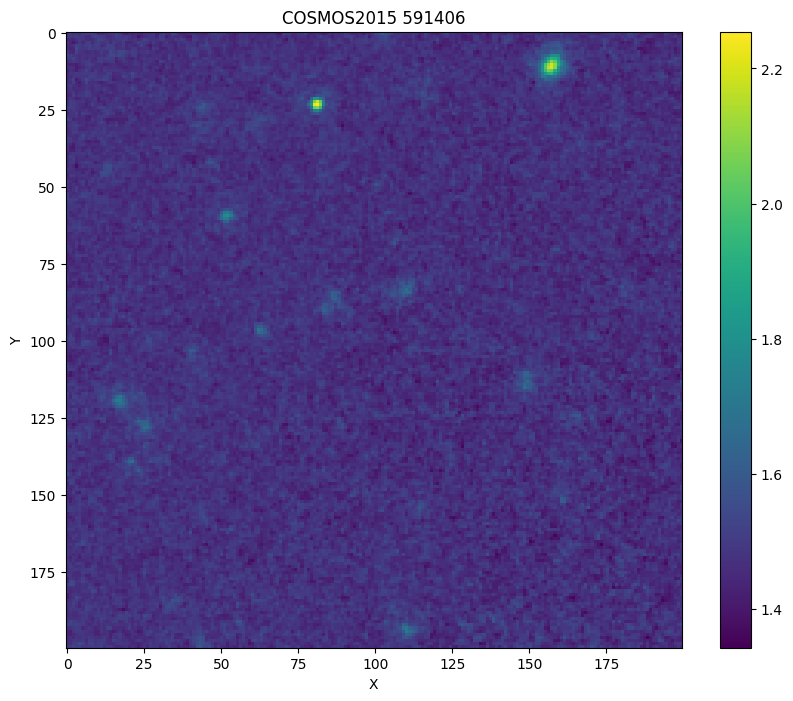

In [ ]:
# Simple image access queries
coord = SkyCoord('150.01d 2.2d', frame='icrs')
spitzer_images = Irsa.query_sia(pos=(coord, 1 * u.arcmin), collection='spitzer_seip').to_table()

# Open a cutout image for one of the science images
science_image = spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'][0]
with fits.open(science_image['access_url'], use_fsspec=True) as hdul:
    cutout = Cutout2D(hdul[0].section, position=coord, size=2 * u.arcmin, wcs=WCS(hdul[0].header))

plt.figure(figsize=(10, 8))
plt.imshow(cutout.data, cmap='viridis')
plt.colorbar()
plt.title(object_name)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

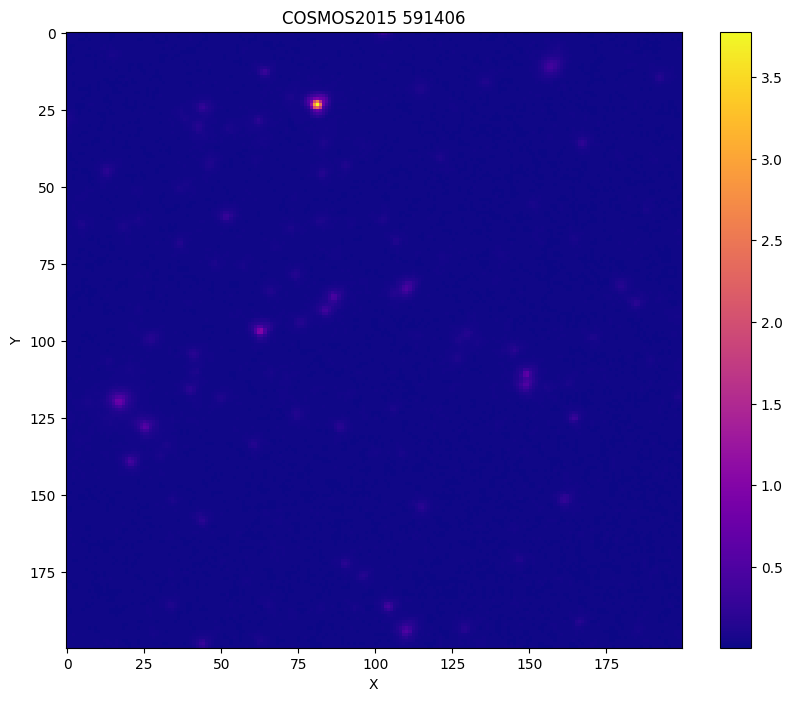

In [ ]:
# Simple image access queries
coord = SkyCoord('150.01d 2.2d', frame='icrs')
spitzer_images = Irsa.query_sia(pos=(coord, 1 * u.arcmin), collection='spitzer_seip').to_table()

# Open a cutout image for one of the science images
science_image = spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'][1]
with fits.open(science_image['access_url'], use_fsspec=True) as hdul:
    cutout = Cutout2D(hdul[0].section, position=coord, size=2 * u.arcmin, wcs=WCS(hdul[0].header))

plt.figure(figsize=(10, 8))
plt.imshow(cutout.data, cmap='plasma')
plt.colorbar()
plt.title(object_name)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

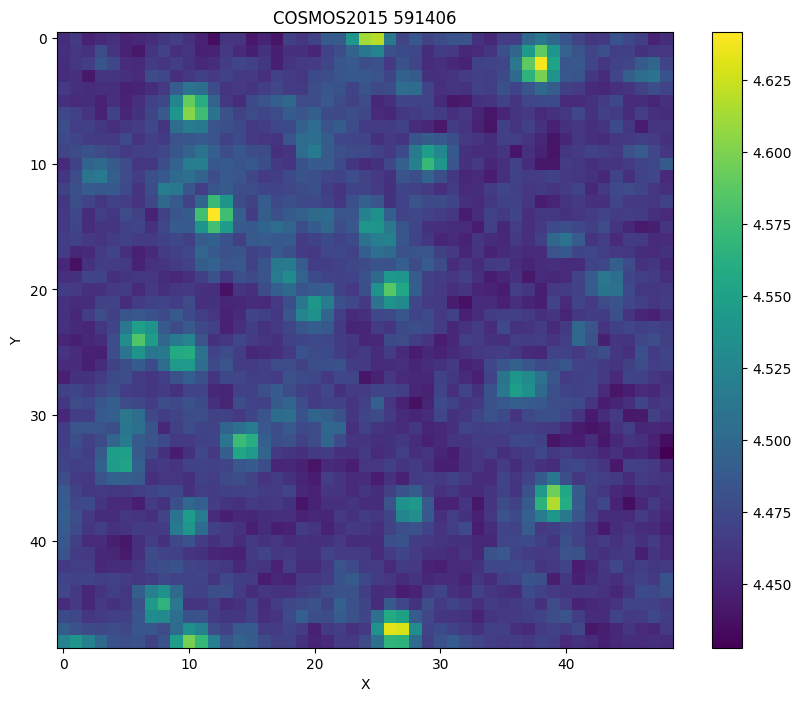

In [ ]:
# Simple image access queries¶
coord = SkyCoord('150.01d 2.2d', frame='icrs')
spitzer_images = Irsa.query_sia(pos=(coord, 1 * u.arcmin), collection='spitzer_seip').to_table()

# Open a cutout image for one of the science images
science_image = spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'][5]
with fits.open(science_image['access_url'], use_fsspec=True) as hdul:
    cutout = Cutout2D(hdul[0].section, position=coord, size=2 * u.arcmin, wcs=WCS(hdul[0].header))

plt.figure(figsize=(10, 8))
plt.imshow(cutout.data, cmap='viridis')
plt.colorbar()
plt.title(object_name)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# How many science picture are therein spitzer_images?
science_images_count = len(spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'])
print("Number of science images:", science_images_count)

Number of science images: 40


<ipython-input-15-534e4067011a>:6: DeprecationWarning: the ``irsa`` module has been moved to astroquery.ipac.irsa, please update your imports.
  from astroquery.irsa import Irsa


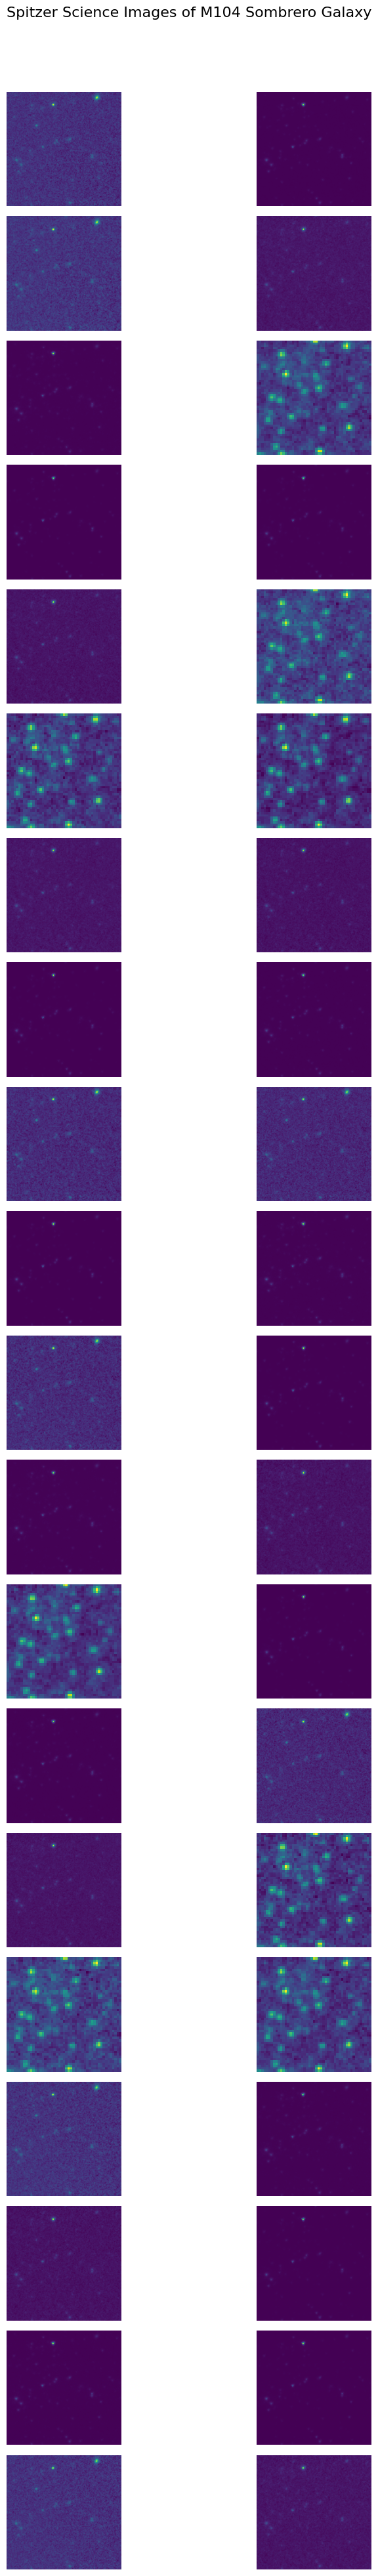

In [ ]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.io import fits
import astropy.units as u
from astroquery.irsa import Irsa
from astropy.coordinates import SkyCoord

# Simple image access queries from IRSA for galaxy images from Spitzer telescope
coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
spitzer_images = Irsa.query_sia(pos=(coord, 1 * u.arcmin), collection='spitzer_seip').to_table()

# Filter for science images only
science_images = spitzer_images[spitzer_images['dataproduct_subtype'] == 'science']

# Set up the figure for a 20x2 grid
fig, axes = plt.subplots(20, 2, figsize=(10, 40))  # Adjust figsize for clarity

# Loop through each of the science images
for i in range(40):
    # Access each science image URL
    science_image = science_images[i]
    with fits.open(science_image['access_url'], use_fsspec=True) as hdul:
        cutout = Cutout2D(hdul[0].section, position=coord, size=2 * u.arcmin, wcs=WCS(hdul[0].header))

    # Plot the cutout in the grid
    ax = axes[i // 2, i % 2]  # Calculate row and column for 2 images per row
    ax.imshow(cutout.data, cmap='viridis')
    ax.axis('off')  # Hide axes for clarity

plt.suptitle('Spitzer Science Images of M104 Sombrero Galaxy', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for the title
plt.show()

*Get more details about the astronomical data file*

In [ ]:
hdul.info()

Filename: <class 'fsspec.implementations.http.HTTPFile'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      77   (4554, 4551)   float32   


In [ ]:
hdul = fits.open(science_image['access_url'], use_fsspec=True)

In [ ]:
#  Access the primary HDU (Header/Data Unit) to get the data
primary_hdu = hdul[0]
data = primary_hdu.data
print(primary_hdu.header) # Display the header to learn more about the file
print(repr(hdul[0].header))  # Science data HDU header

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel - floating point                NAXIS   =                    2 / Number of axes                                 NAXIS1  =                 4554 / X axis length                                  NAXIS2  =                 4551 / Y axis length                                  ORIGIN  = 'Spitzer Super-Mosaic Pipeline' / Origin of these image data          CREATOR = 'Spitzer Science Center' / Creator of this FITS file                                                                                                            / TIME AND EXPOSURE INFORMATION                                                                                                                       TELESCOP= 'Spitzer '           / Name of Telescope                              INSTRUME= 'IRAC    '           / Name of Instrument                             CHNLNUM =                    4 / Instrum

In [ ]:
# Close the FITS file
hdul.close()